In [1]:
# A linear regression learning algorithm example using TensorFlow library.

# Author: Aymeric Damien
# Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [8]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.086125165 W= 0.303201 b= 0.41582
Epoch: 0100 cost= 0.085066497 W= 0.300013 b= 0.438756
Epoch: 0150 cost= 0.084130228 W= 0.297014 b= 0.460328
Epoch: 0200 cost= 0.083302252 W= 0.294194 b= 0.480618
Epoch: 0250 cost= 0.082570136 W= 0.291541 b= 0.4997
Epoch: 0300 cost= 0.081922710 W= 0.289046 b= 0.517647
Epoch: 0350 cost= 0.081350207 W= 0.2867 b= 0.534527
Epoch: 0400 cost= 0.080843955 W= 0.284493 b= 0.550404
Epoch: 0450 cost= 0.080396332 W= 0.282417 b= 0.565336
Epoch: 0500 cost= 0.080000505 W= 0.280465 b= 0.579381
Epoch: 0550 cost= 0.079650544 W= 0.278628 b= 0.592591
Epoch: 0600 cost= 0.079341106 W= 0.276902 b= 0.605015
Epoch: 0650 cost= 0.079067573 W= 0.275277 b= 0.616699
Epoch: 0700 cost= 0.078825757 W= 0.27375 b= 0.627687
Epoch: 0750 cost= 0.078611992 W= 0.272313 b= 0.638021
Epoch: 0800 cost= 0.078423008 W= 0.270962 b= 0.647741
Epoch: 0850 cost= 0.078255944 W= 0.269692 b= 0.656882
Epoch: 0900 cost= 0.078108251 W= 0.268496 b= 0.665481
Epoch: 0950 cost= 0.077977717 W= 0

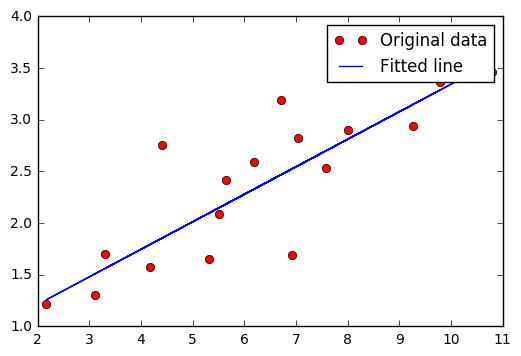

In [12]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()